In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:

# 1. Load dataset
df = pd.read_csv('large_movies_data_with_details.csv')
df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,homepage,imdb_id,origin_country,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline
0,False,/zxxIzU6XjzTQKS9pPeLmYTDTFL1.jpg,"[35, 80]",209189,en,Life of Crime,Two common criminals get more than they bargai...,5.395,/apO5xGmcEHpdIBc3Zreax7MXl2m.jpg,2013-09-14,...,NaN,tt1663207,['US'],"[{'id': 23700, 'logo_path': None, 'name': 'Abb...","[{'iso_3166_1': 'US', 'name': 'United States o...",265452,94,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Right target. Wrong woman.
1,False,/69EFgWWPFWbRNHmQgYdSnyJ94Ge.jpg,"[28, 12, 878]",49521,en,Man of Steel,A young boy learns that he has extraordinary p...,4.600,/dksTL9NXc3GqPBRHYHcy1aIwjS.jpg,2013-06-12,...,https://www.warnerbros.com/movies/man-steel,tt0770828,['US'],"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",668045518,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You will believe that a man can fly.
2,False,/63y4XSVTZ7mRzAzkqwi3o0ajDZZ.jpg,"[80, 18, 35]",106646,en,The Wolf of Wall Street,A New York stockbroker refuses to cooperate in...,4.579,/kW9LmvYHAaS9iA0tHmZVq8hQYoq.jpg,2013-12-25,...,http://www.thewolfofwallstreet.com/,tt0993846,['US'],"[{'id': 19177, 'logo_path': None, 'name': 'Red...","[{'iso_3166_1': 'US', 'name': 'United States o...",392000000,180,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Earn. Spend. Party.
3,False,/AgWnDRoGbbE6oXJWZpQVQWWzaUa.jpg,[35],209244,en,Are You Here,"When Steve Dallas, a womanizing local weatherm...",5.338,/v83MAkGH8jF8uNhJhKgADqw3Xup.jpg,2013-09-07,...,NaN,tt1545754,['US'],"[{'id': 10161, 'logo_path': None, 'name': 'Gil...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,114,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friendship... there's nothing in it for anybody.
4,False,/xEY0MV2jSQBz9iOJfCFvLTiPGMA.jpg,"[53, 80]",75656,en,Now You See Me,An FBI agent and an Interpol detective track a...,4.280,/tWsNYbrqy1p1w6K9zRk0mSchztT.jpg,2013-05-29,...,NaN,tt1670345,['US'],"[{'id': 491, 'logo_path': '/5LvDUt3KmvRnXQ4Nrd...","[{'iso_3166_1': 'US', 'name': 'United States o...",351723989,116,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"The closer you look, the less you’ll see."


In [4]:
# 2. Initial dataset info
print(" Initial dataset shape")
print(df.shape)
print("\n Missing values per column before cleaning")
print(df.isnull().sum(), "\n")

 Initial dataset shape
(1100, 27)

 Missing values per column before cleaning
adult                      0
backdrop_path              1
genre_ids                  0
id                         0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
release_date               0
title                      0
video                      0
vote_average               0
vote_count                 0
belongs_to_collection    768
budget                     0
genres                     0
homepage                 332
imdb_id                    3
origin_country             0
production_companies       0
production_countries       0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  237
dtype: int64 



In [5]:
# 3. Filter to top 3 languages
top_langs = ['en', 'fr', 'ja']
df = df[df['original_language'].isin(top_langs)].copy()


In [6]:
# 4. Drop rows with missing numeric values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_clean = df.dropna(subset=numeric_cols)

In [7]:
# 5. After cleaning info
print(" Dataset shape after filtering & dropping NA")
print(df_clean.shape)
print("\n Missing values per column after cleaning")
print(df_clean.isnull().sum(), "\n")


 Dataset shape after filtering & dropping NA
(1012, 27)

 Missing values per column after cleaning
adult                      0
backdrop_path              1
genre_ids                  0
id                         0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
release_date               0
title                      0
video                      0
vote_average               0
vote_count                 0
belongs_to_collection    696
budget                     0
genres                     0
homepage                 284
imdb_id                    2
origin_country             0
production_companies       0
production_countries       0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  188
dtype: int64 



In [8]:
# 6. Encode 'original_language'
le = LabelEncoder()
df_clean['lang_enc'] = le.fit_transform(df_clean['original_language'])
print(" Label Transformation (first 5 rows)")
print(df_clean[['original_language', 'lang_enc']].head(), "\n")

 Label Transformation (first 5 rows)
  original_language  lang_enc
0                en         0
1                en         0
2                en         0
3                en         0
4                en         0 



In [9]:
# 7. Prepare features and target
exclude_cols = ['lang_enc', 'id']
features = [c for c in numeric_cols if c not in exclude_cols]
X = df_clean[features].values
y = df_clean['lang_enc'].values

In [10]:
# 8. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(" Train/Test split sizes")
print(f"Train: {X_train.shape}, Test: {X_test.shape}\n")


 Train/Test split sizes
Train: (708, 6), Test: (304, 6)



In [11]:
# 9. Show raw features before scaling
print("Training Features BEFORE scaling")
print(pd.DataFrame(X_train, columns=features).head(), "\n")
print("Test Features BEFORE scaling")
print(pd.DataFrame(X_test, columns=features).head(), "\n")

Training Features BEFORE scaling
   popularity  vote_average  vote_count       budget      revenue  runtime
0       3.828         6.680       377.0          0.0          0.0    100.0
1       4.123         7.429      3461.0  100000000.0   30552111.0    153.0
2       3.831         7.009      1478.0   17200000.0   23800000.0    115.0
3       4.491         7.628     16971.0   81000000.0  414351546.0    129.0
4       3.861         7.223      5069.0   80000000.0  311950384.0    104.0 

Test Features BEFORE scaling
   popularity  vote_average  vote_count      budget      revenue  runtime
0       3.862         5.800      2744.0   5500000.0   62198461.0     89.0
1       3.839         6.146       213.0         0.0          0.0     87.0
2       4.089         6.942      3551.0  22000000.0   51695362.0    100.0
3       4.190         6.873      7905.0  50100000.0  153962963.0    105.0
4       3.653         8.147      1649.0         0.0          0.0      6.0 



In [12]:
# 10. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [13]:
# 11. Show scaled features after transformation
print("Training Features AFTER scaling")
print(pd.DataFrame(X_train_scaled, columns=features).head(), "\n")
print("Test Features AFTER scaling")
print(pd.DataFrame(X_test_scaled, columns=features).head(), "\n")

Training Features AFTER scaling
   popularity  vote_average  vote_count    budget   revenue   runtime
0   -0.437310     -0.117369   -0.820970 -0.761176 -0.612412 -0.470086
1    0.025524      0.843093   -0.201915  0.736132 -0.499610  1.813938
2   -0.432603      0.304516   -0.599965 -0.503639 -0.524540  0.176336
3    0.602889      1.098275    2.509964  0.451644  0.917412  0.779663
4   -0.385535      0.578934    0.120861  0.436671  0.539338 -0.297707 

Test Features AFTER scaling
   popularity  vote_average  vote_count    budget   revenue   runtime
0   -0.383966     -1.245815   -0.345839 -0.678824 -0.382769 -0.944129
1   -0.420052     -0.802131   -0.853890 -0.761176 -0.612412 -1.030319
2   -0.027820      0.218600   -0.183849 -0.431768 -0.421547 -0.470086
3    0.130642      0.130120    0.690134 -0.011025 -0.043966 -0.254612
4   -0.711872      1.763802   -0.565640 -0.761176 -0.612412 -4.520997 



In [14]:
# 12. Train & evaluate 9 SVMs
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]
results = []

for kernel in kernels:
    for C in C_values:
        params = {'kernel': kernel, 'C': C, 'gamma': 'scale'}
        if kernel == 'poly':
            params.update({'degree': 2, 'coef0': 1})
        clf = SVC(**params)
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Kernel: {kernel}, C: {C}")
        print("Confusion Matrix:")
        print(cm)
        print("Classification Report:")
        print(classification_report(y_test, y_pred, digits=4), "\n")
        
        results.append({'kernel': kernel, 'C': C, 'accuracy': acc})

Kernel: linear, C: 0.1
Confusion Matrix:
[[256   0   0]
 [ 38   0   0]
 [ 10   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8421    1.0000    0.9143       256
           1     0.0000    0.0000    0.0000        38
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.8421       304
   macro avg     0.2807    0.3333    0.3048       304
weighted avg     0.7091    0.8421    0.7699       304
 

Kernel: linear, C: 1
Confusion Matrix:
[[255   0   1]
 [ 38   0   0]
 [ 10   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8416    0.9961    0.9123       256
           1     0.0000    0.0000    0.0000        38
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.8388       304
   macro avg     0.2805    0.3320    0.3041       304
weighted avg     0.7087    0.8388    0.7683       304
 

Kernel: linear, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [15]:
# 13. Comparison table of accuracies
results_df = pd.DataFrame(results)
print("Accuracy comparison (kernel vs C)")
print(results_df, "\n")

Accuracy comparison (kernel vs C)
   kernel     C  accuracy
0  linear   0.1  0.842105
1  linear   1.0  0.838816
2  linear  10.0  0.842105
3    poly   0.1  0.842105
4    poly   1.0  0.871711
5    poly  10.0  0.904605
6     rbf   0.1  0.842105
7     rbf   1.0  0.884868
8     rbf  10.0  0.891447 



In [16]:
# 14. PCA for 2D visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

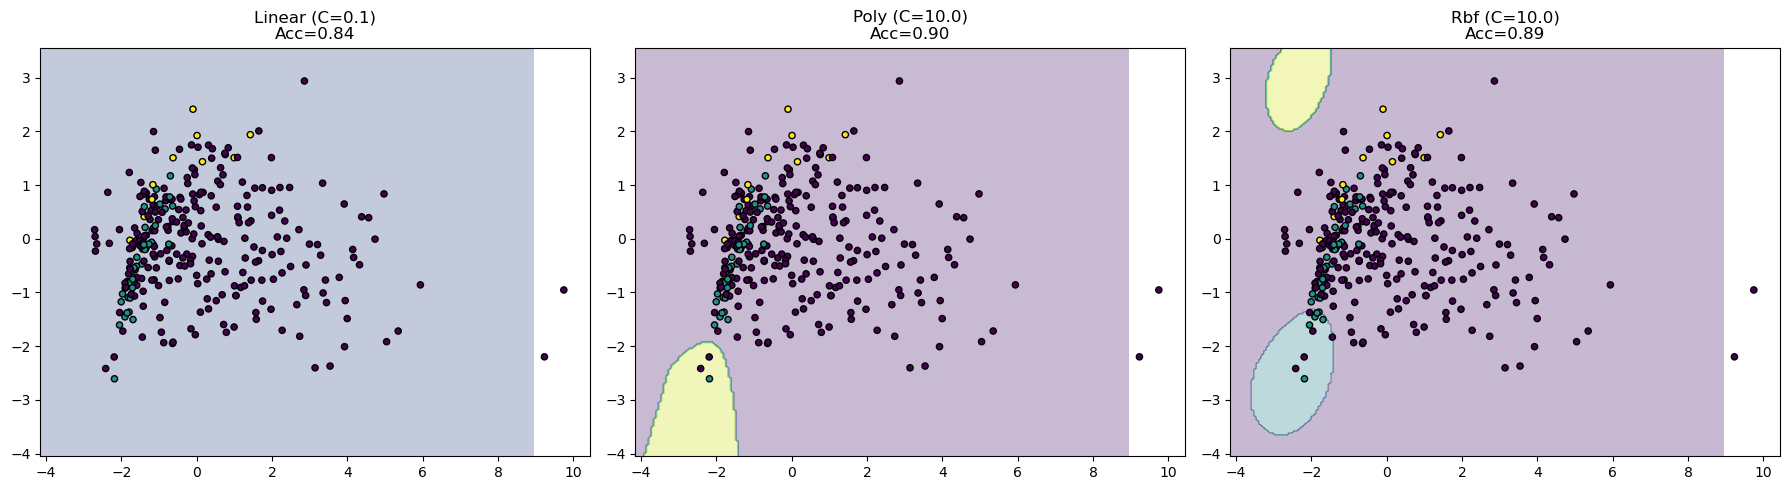

In [17]:
# 15. Plot decision boundaries (best C for each kernel)
best = results_df.loc[results_df.groupby('kernel')['accuracy'].idxmax()]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
xx_min, xx_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() + 1
yy_min, yy_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 200),
                     np.linspace(yy_min, yy_max, 200))

for ax, (_, row) in zip(axes, best.iterrows()):
    params = {'kernel': row['kernel'], 'C': row['C'], 'gamma': 'scale'}
    if row['kernel'] == 'poly':
        params.update({'degree': 2, 'coef0': 1})
    model = SVC(**params).fit(X_train_pca, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, edgecolor='k', s=20)
    ax.set_title(f"{row['kernel'].capitalize()} (C={row['C']})\nAcc={row['accuracy']:.2f}")

plt.tight_layout()
plt.show()

In [18]:
for kernel in kernels:
    for C in C_values:
        params = {'kernel': kernel, 'C': C, 'gamma': 'scale'}
        if kernel == 'poly':
            params.update({'degree': 2, 'coef0': 1})
        clf = SVC(**params).fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        
        print(f"Kernel = {kernel}, C = {C}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred, digits=4))
        print("-" * 50)
        
        results.append({'kernel': kernel, 'C': C, 'accuracy': accuracy_score(y_test, y_pred)})

# Summary table
results_df = pd.DataFrame(results)
print("Accuracy Comparison:")
print(results_df.to_string(index=False))


Kernel = linear, C = 0.1
Confusion Matrix:
[[256   0   0]
 [ 38   0   0]
 [ 10   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8421    1.0000    0.9143       256
           1     0.0000    0.0000    0.0000        38
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.8421       304
   macro avg     0.2807    0.3333    0.3048       304
weighted avg     0.7091    0.8421    0.7699       304

--------------------------------------------------
Kernel = linear, C = 1
Confusion Matrix:
[[255   0   1]
 [ 38   0   0]
 [ 10   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8416    0.9961    0.9123       256
           1     0.0000    0.0000    0.0000        38
           2     0.0000    0.0000    0.0000        10

    accuracy                         0.8388       304
   macro avg     0.2805    0.3320    0.3041       304
weighted avg     0.7

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

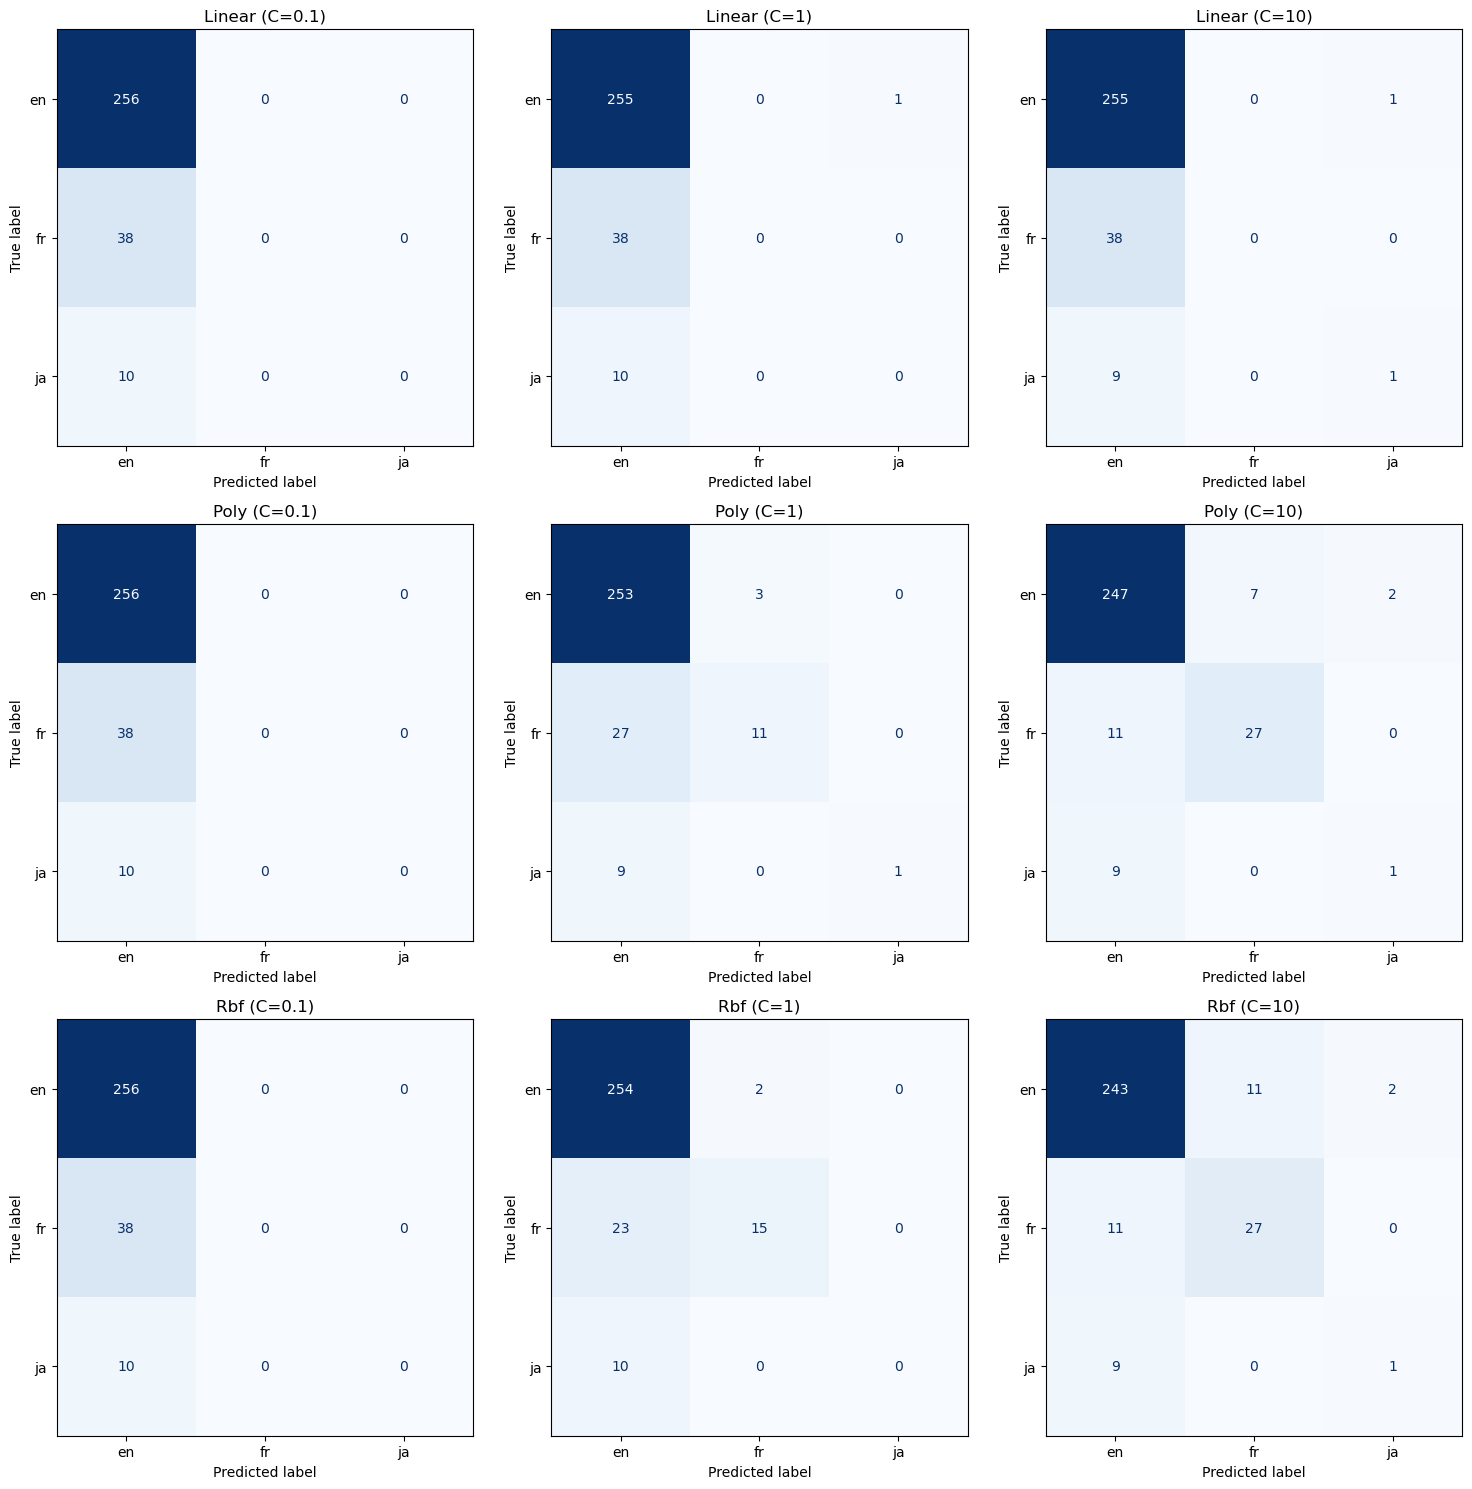

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset and select features
df = pd.read_csv('large_movies_data_with_details.csv')
features = ['popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'runtime']
df = df[df['original_language'].isin(['en', 'fr', 'ja'])]
df = df.dropna(subset=features)

# Encode target
le = LabelEncoder()
df['lang_enc'] = le.fit_transform(df['original_language'])

# Prepare data
X = df[features].values
y = df['lang_enc'].values

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Define kernels and C values
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

# Plot 3x3 confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        ax = axes[i, j]
        params = {'kernel': kernel, 'C': C, 'gamma': 'scale'}
        if kernel == 'poly':
            params.update({'degree': 2, 'coef0': 1})
        clf = SVC(**params).fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
        disp.plot(ax=ax, values_format='d', cmap='Blues', colorbar=False)
        ax.set_title(f"{kernel.capitalize()} (C={C})")
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


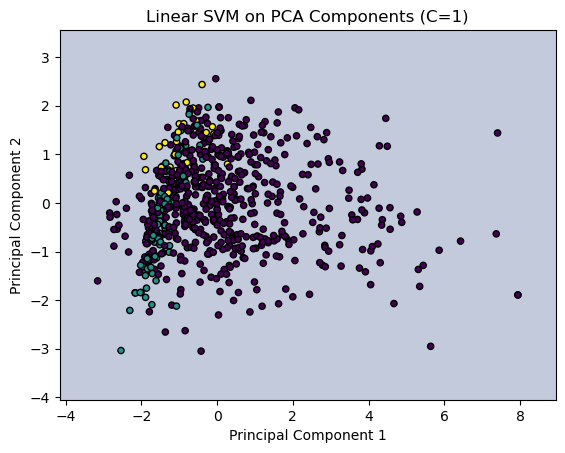

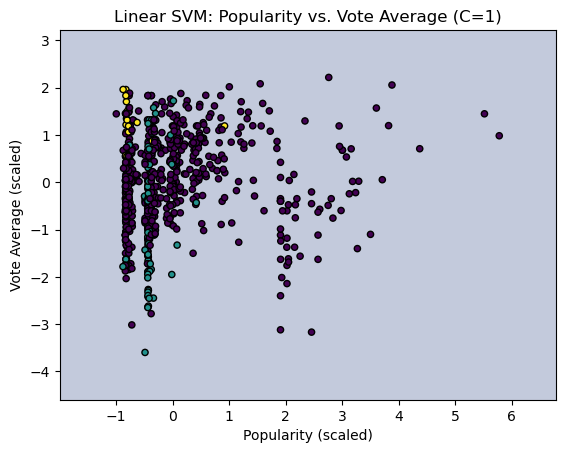

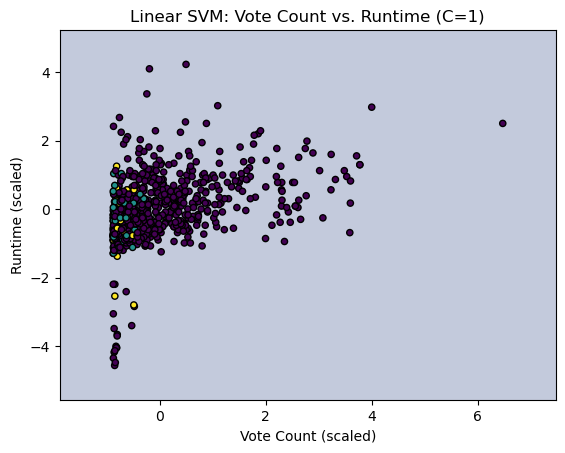

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load and filter data
df = pd.read_csv('large_movies_data_with_details.csv')
df = df[df['original_language'].isin(['en', 'fr', 'ja'])].dropna(
    subset=['popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'runtime']
)

# Encode the target labels
le = LabelEncoder()
df['lang_enc'] = le.fit_transform(df['original_language'])

# Select numeric features
numeric_features = ['popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'runtime']
X = df[numeric_features].values
y = df['lang_enc'].values

# Train/test split and scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Function to plot linear SVM decision boundary
def plot_decision_boundary(X2d, y2d, title, xlabel, ylabel):
    clf = SVC(kernel='linear', C=1.0).fit(X2d, y2d)
    x_min, x_max = X2d[:, 0].min() - 1, X2d[:, 0].max() + 1
    y_min, y_max = X2d[:, 1].min() - 1, X2d[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X2d[:, 0], X2d[:, 1], c=y2d, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# 1) PCA-reduced components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
plot_decision_boundary(
    X_train_pca, y_train,
    title="Linear SVM on PCA Components (C=1)",
    xlabel="Principal Component 1",
    ylabel="Principal Component 2"
)

# 2) Popularity vs. Vote Average
X_pop_vote = X_train_scaled[:, [0, 1]]
plot_decision_boundary(
    X_pop_vote, y_train,
    title="Linear SVM: Popularity vs. Vote Average (C=1)",
    xlabel="Popularity (scaled)",
    ylabel="Vote Average (scaled)"
)

# 3) Vote Count vs. Runtime
X_count_runtime = X_train_scaled[:, [2, 5]]
plot_decision_boundary(
    X_count_runtime, y_train,
    title="Linear SVM: Vote Count vs. Runtime (C=1)",
    xlabel="Vote Count (scaled)",
    ylabel="Runtime (scaled)"
)


Comparison of SVM kernels and C values:
Kernel    C  Accuracy
Linear  0.1  0.842105
Linear  1.0  0.838816
Linear 10.0  0.842105
  Poly  0.1  0.842105
  Poly  1.0  0.871711
  Poly 10.0  0.904605
   Rbf  0.1  0.842105
   Rbf  1.0  0.884868
   Rbf 10.0  0.891447


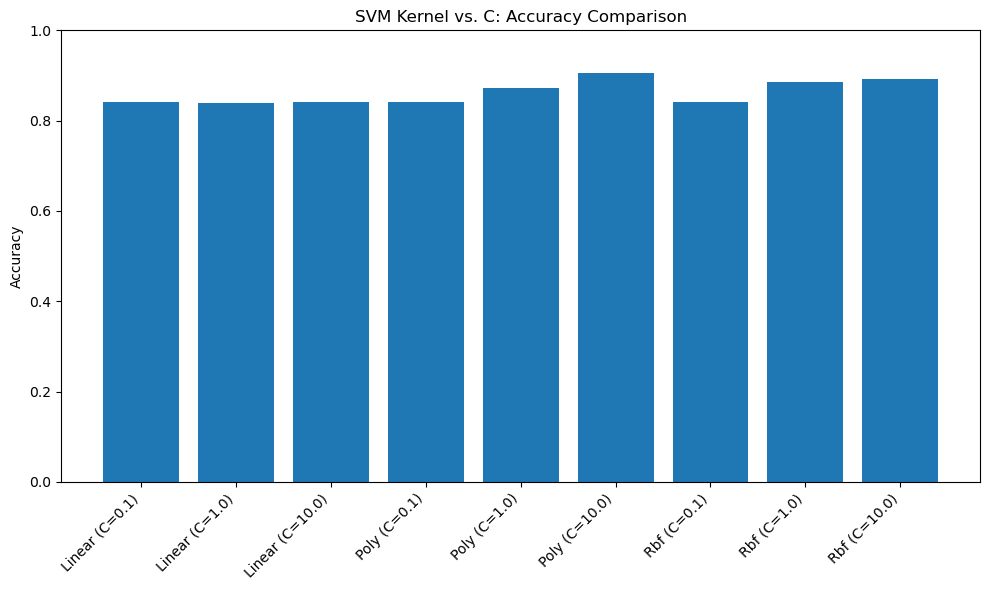

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv('large_movies_data_with_details.csv')
df = df[df['original_language'].isin(['en', 'fr', 'ja'])].dropna(
    subset=['popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'runtime']
)

# Encode target
le = LabelEncoder()
df['lang_enc'] = le.fit_transform(df['original_language'])

# Select features and target
features = ['popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'runtime']
X = df[features].values
y = df['lang_enc'].values

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Evaluate SVMs with different kernels and C values
kernels  = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]
results  = []

for kernel in kernels:
    for C in C_values:
        params = {'kernel': kernel, 'C': C, 'gamma': 'scale'}
        if kernel == 'poly':
            params.update({'degree': 2, 'coef0': 1})
        clf = SVC(**params).fit(X_train_scaled, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test_scaled))
        results.append({'Kernel': kernel.capitalize(), 'C': C, 'Accuracy': acc})

# Create results DataFrame
results_df = pd.DataFrame(results)
print("Comparison of SVM kernels and C values:")
print(results_df.to_string(index=False))

# Plot comparison
plt.figure(figsize=(10,6))
labels = results_df['Kernel'] + " (C=" + results_df['C'].astype(str) + ")"
plt.bar(labels, results_df['Accuracy'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('SVM Kernel vs. C: Accuracy Comparison')
plt.tight_layout()
plt.show()
